# Part 1 - Preprocessing

Scripts to show python and NLP

In [1]:
import re
import spacy
import html5lib
from bs4 import BeautifulSoup
from urllib import request
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import wordcloud as wc
from gensim.models.phrases import Phrases, Phraser
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# sentence tokenize object
sentences = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alisson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alisson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/alisson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/alisson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/alisson/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Dealing with web pages

In [2]:
spacy.cli.download("en_core_web_md")  # en_core_web_sm en_core_web_lg
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
urlData1 = f"https://docs.google.com/spreadsheets/d/1sbp6Y1YZWHILHMma8qphe8tgJvDQ7s_ubLJhY2hSJI8/gviz/tq?tqx=out:csv&sheet=test"
urlData2 = f"https://docs.google.com/spreadsheets/d/1CSIVmE1NKiui-EEEHRnnsXzXmy908mQRtasSmtQe7x8/gviz/tq?tqx=out:csv&sheet=validation"

df1 = pd.read_csv(urlData1)
df2 = pd.read_csv(urlData2)

news = df1.append(df2, ignore_index=True)['article']
news

/tmp/ipykernel_68124/2914606262.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news = df1.append(df2, ignore_index=True)['article']


0        Ever noticed how plane seats appear to be gett...
1        A drunk teenage boy had to be rescued by secur...
2        Dougie Freedman is on the verge of agreeing a ...
3        Liverpool target Neto is also wanted by PSG an...
4        Bruce Jenner will break his silence in a two-h...
                               ...                        
24853    All shops will be allowed to offer ‘click and ...
24854    Mo Farah has had his nationality called into q...
24855    Wolves kept their promotion hopes alive with a...
24856    A Brown University graduate student  has died ...
24857    As thousands of young Australians look to buy ...
Name: article, Length: 24858, dtype: object

In [4]:
treatment = False
wordcloud = True

Removing Blacklist words:

In [5]:
if treatment:
  pattern = re.compile(r"</{0,}\[\d+>")

  blackList = ["cnn", "bbc", "(CNN)", '\xad', "abc news", "\u200b", "\u202c",
                "\u202a#", "\u200e", "\u202c", "whyimnotvotingforhillary", "\"\'"]
  blackList = list(map(lambda a: "(?i)" + a, blackList))
  news.replace(blackList, "", inplace=True, regex=True)

  for i in range(len(news)):
      news[i] = re.sub(
          r"((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*", "", news[i])

  news

In [6]:
if treatment:
  dlemma=[]
  for d in news:
    tdoc=nlp(d)
    lm=[" ".join([token.lemma_.lower() for token in tdoc if token.pos_ != '-PRON-' and token.pos_ in ['NOUN','PROPN'] and token.is_stop == False and token.is_punct == False and token.is_digit == False and len(token.lemma_) > 3])]
    dlemma.append(lm)
  dlemma

In [7]:
if treatment:
  tokens = []
  for doc in dlemma:
      tokens.append(doc[0].split())
  tokens

In [8]:
if treatment:
  phrases = Phrases(tokens, min_count=2)
  bigram = Phraser(phrases)
  bdocs = [bigram[d] for d in tokens]

  [print(d) for d in bdocs]
  for d in bdocs:
    for w in d:
      if '_' in w:
        print(w)

  tokens = bdocs

  with open('tokens.txt', 'w') as temp_file:
    for row in tokens:
      for index, item in enumerate(row):
        if index == len(row)-1:
          temp_file.write("%s\n" % item)
        else:
          temp_file.write("%s," % item)

### Statistcs

- N of documents
- the shortest one (n of words)
- the longest one (n of words)
- the average size 

In [9]:
file = open('tokens.txt', 'r')
lines = file.readlines()
tokens = [i.replace("\n", "").split(",") for i in lines]

n_documents = len(tokens)
shortest = min([len(d) for d in tokens])
largest = max([len(d) for d in tokens])
average = sum([len(d) for d in tokens]) / n_documents

print("number of documents: {}\nshortest: {}\nlargest: {}\naverage: {}".format(n_documents, shortest, largest, average))

number of documents: 24858
shortest: 8
largest: 1043
average: 163.72443478960497


n of words of dictionary: 177790
n of words of collection: 4069862


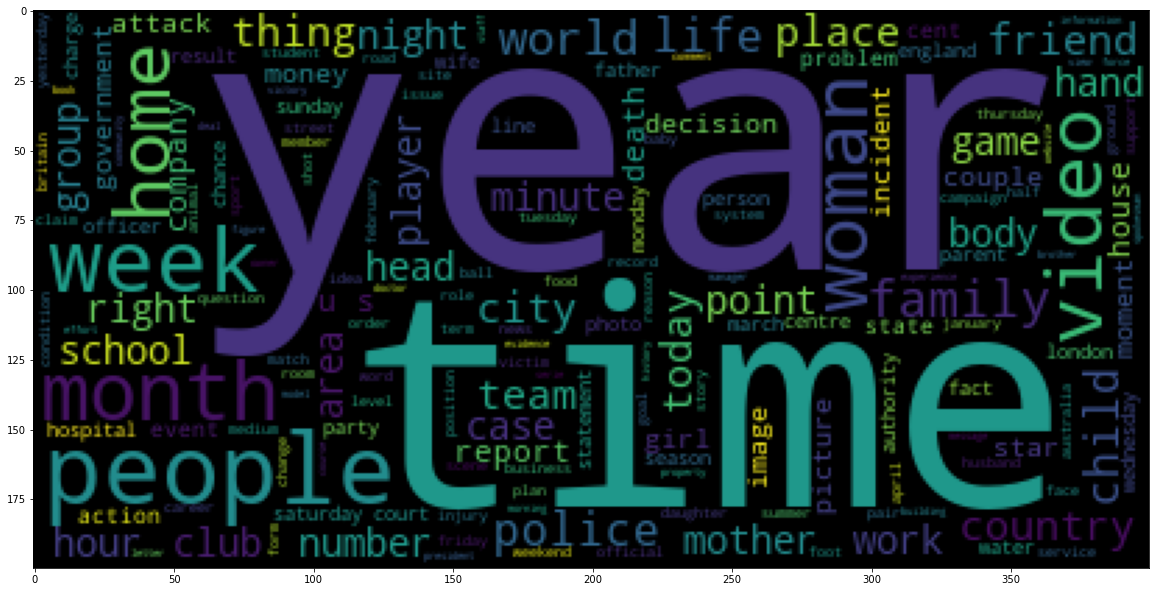

In [10]:
if wordcloud:
  coll = ''
  allTokens = []
  dictionaryOfString = []

  for d in tokens:
    [allTokens.append(w) for w in d]
    collect = ' '.join([w for w in d])
    dictionaryOfString.append(collect)
    coll = coll+' '+collect

  mycloud = wc.WordCloud().generate(coll)
  plt.figure(figsize=(20, 30))
  plt.imshow(mycloud)

  setOfTokens = set(allTokens)

  print("n of words of dictionary: {}\nn of words of collection: {}".format(
    len(setOfTokens), len(allTokens)))

# Part 2

In [11]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import numpy as np
# import pandas as pd

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(dictionaryOfString)

In [12]:
# features=vectorizer.get_feature_names()
# dense = X.todense()
# denseList=dense.tolist()
# df = pd.DataFrame(denseList, columns=set(features))
# df